In [0]:
%matplotlib inline 
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
mpg_df = pd.read_csv("/content/drive/My Drive/AIML_NoteBooks/LabAndAssignments/cars-dataset.csv")  
mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [5]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [0]:
mpg_df = mpg_df.replace('?', np.nan)

In [7]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [0]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [9]:
numeric_cols = mpg_df.drop('car name', axis=1)
car_names = pd.DataFrame(mpg_df[['car name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


Creating scatter plot to find out the clustering

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


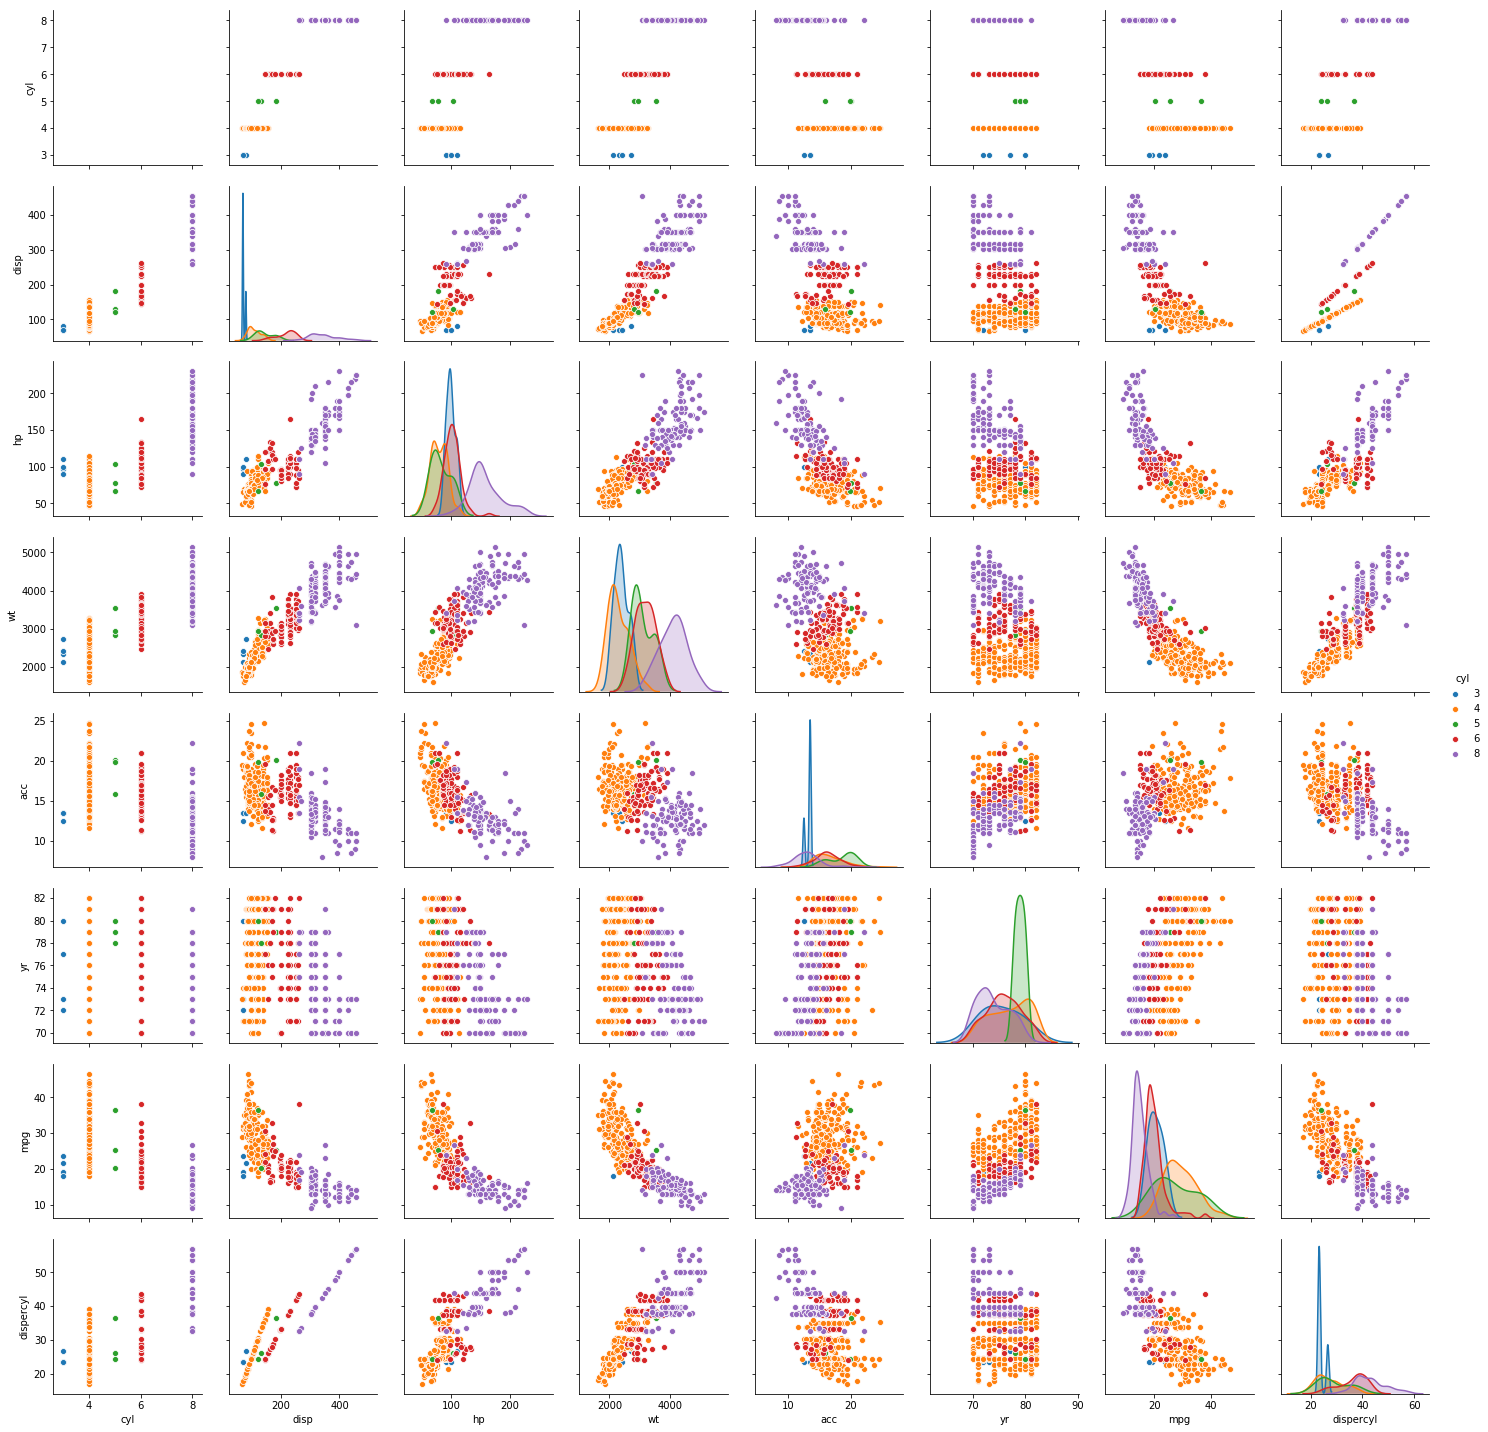

In [10]:

mpg_df_attr = mpg_df.iloc[:, 0:7]
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'cyl')   # to plot density curve instead of histogram

In [0]:
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'cyl':'mpg']
mpg_df_attr_z = mpg_df_attr.apply(zscore)


mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values

In [12]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428941e+07
1,3,3.420799e+07
2,4,1.905160e+07
3,5,1.376961e+07


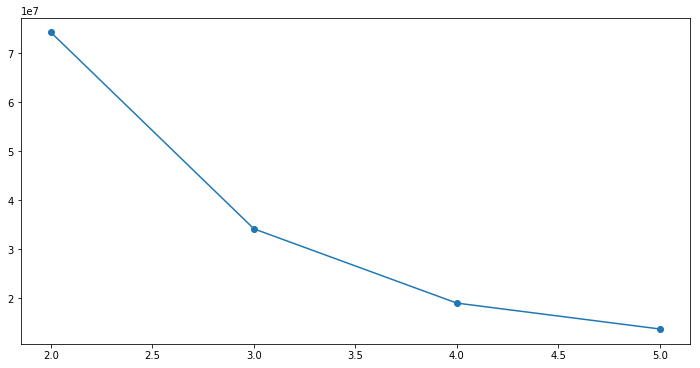

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters.Let us start with 3 clusters

In [0]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(mpg_df_attr_z)
mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [15]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [16]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr_z) )
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


In [17]:
prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction 
mpg_df_attr_z["GROUP"]
# Creating a new column "GROUP" which will hold the cluster id of each record

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     2
16     2
17     2
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     0
26     0
27     0
28     0
29     1
      ..
368    1
369    1
370    1
371    1
372    1
373    1
374    1
375    1
376    1
377    1
378    1
379    1
380    1
381    1
382    1
383    1
384    1
385    1
386    2
387    1
388    1
389    2
390    1
391    1
392    1
393    1
394    1
395    1
396    1
397    1
Name: GROUP, Length: 398, dtype: int32

Convert Data and Centroid info into box plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969a44ab70>,
      dtype=object)

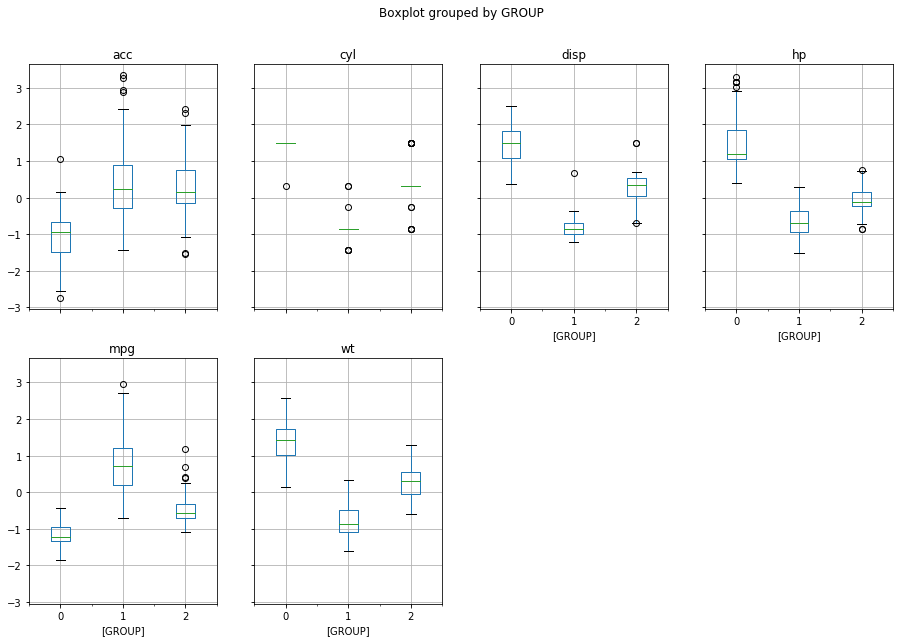

In [18]:


import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))


Handling outliers

In [19]:
data = mpg_df_attr_z
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969891a588>,
      dtype=object)

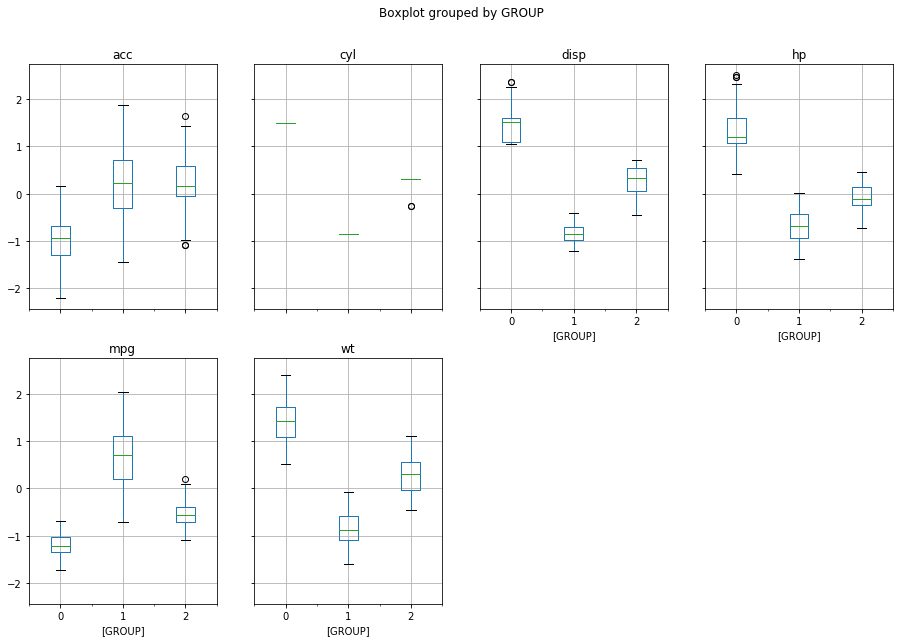

In [20]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

In [0]:
cluster0 = mpg_df_attr_z[mpg_df_attr_z['GROUP'] ==0]
cluster1 = mpg_df_attr_z[mpg_df_attr_z['GROUP'] ==1]
cluster2 = mpg_df_attr_z[mpg_df_attr_z['GROUP'] ==2]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
model = LinearRegression()


In [0]:
def modelCoefficients(cluster): 
	y = cluster['mpg']
	X = cluster.drop(['mpg','GROUP'], axis=1)
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
	model.fit(X_train, y_train)
	return model.coef_


In [24]:
# cluster0 coefficients
modelCoefficients(cluster0)


array([-0.34425153,  0.06817685, -0.20412768, -0.13689477, -0.11447799])

In [25]:
# cluster1 coefficients
modelCoefficients(cluster1)

array([ 1.67365671, -0.49149099, -0.87254895, -0.10873094, -0.08840097])

In [26]:
# cluster2 coefficients
modelCoefficients(cluster2)

array([ 0.33757686, -0.19818017,  0.06021555, -0.30542837, -0.03114933])